In [12]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import itertools

In [45]:
import binascii

# Open in binary mode (so you don't read two byte line endings on Windows as one byte)
# and use with statement (always do this to avoid leaked file descriptors, unflushed files)
with open(fn, 'rb') as f:
    # Slurp the whole file and efficiently convert it to hex all at once
    hexdata = binascii.hexlify(f.read(1000))

print(hexdata)

b'5367a38601012d5501052f9a71804736314c534453030000000017291302201221004a10000088a13f0001000000900800007608000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [2]:
size = 19890176

size / 2**15

607.0

In [3]:
fn =Path("~/Downloads/TOM___01.M12").expanduser()
fn.exists()

True

# Načítání dat

Zkouším data načítat jako float a integer uložený na 2, 4, nebo 8 bytech. Uvažuji, že je na začátku hlavička neznámé délky a tak zkouším přeskočit prvních 1000 bytů a pak všechny posuny o jeden byte.

f2


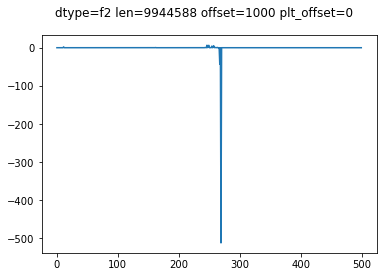

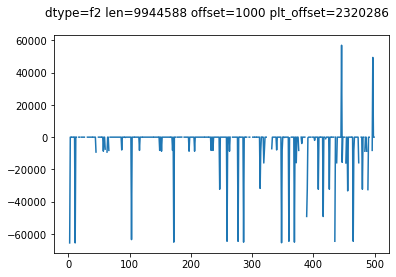

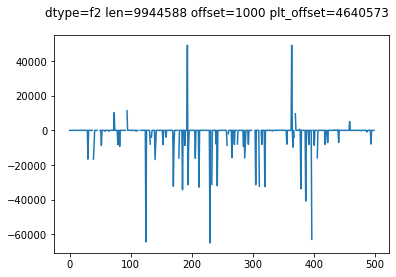

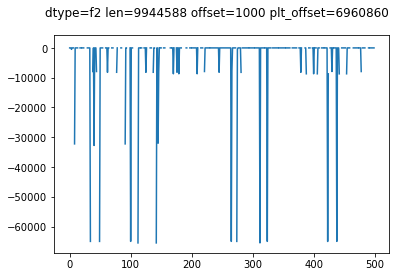

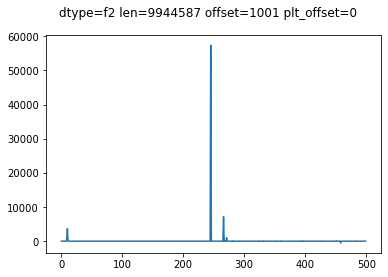

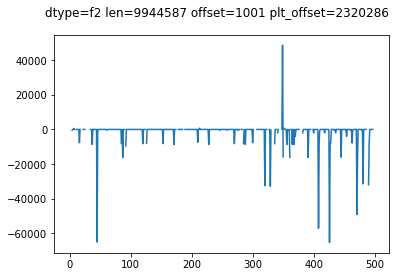

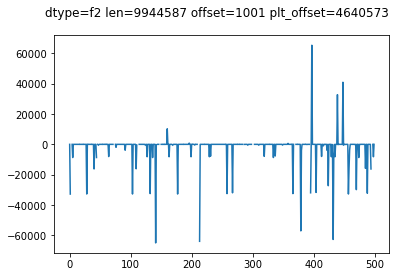

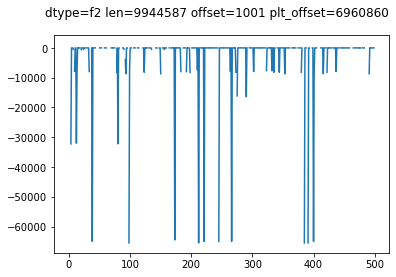

f4


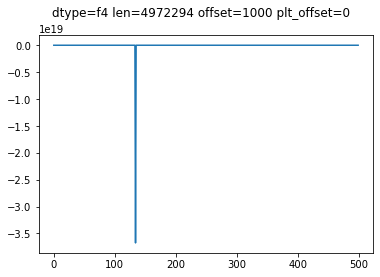

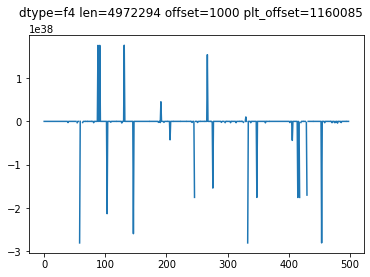

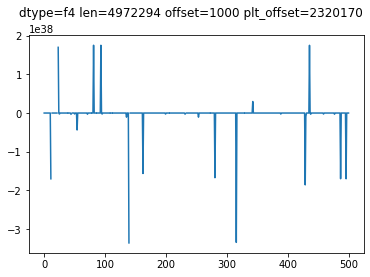

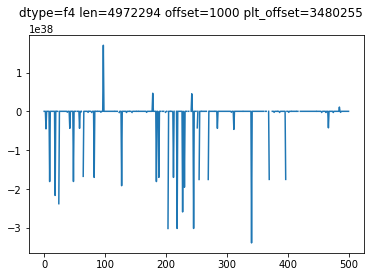

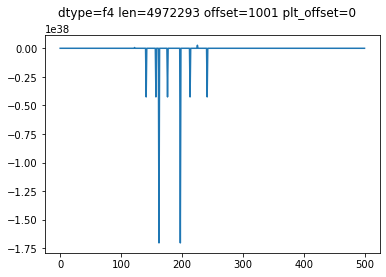

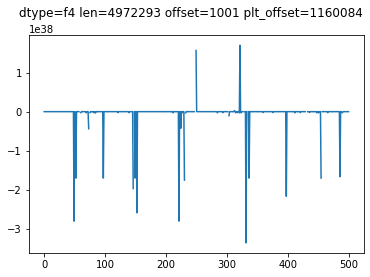

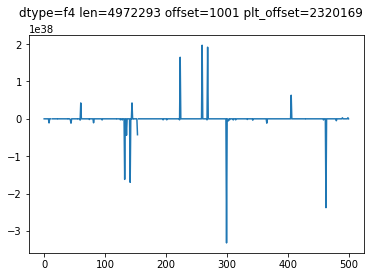

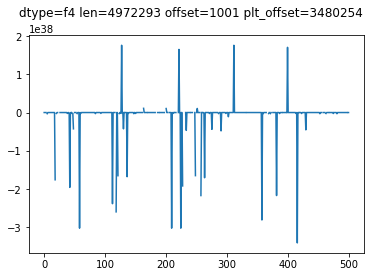

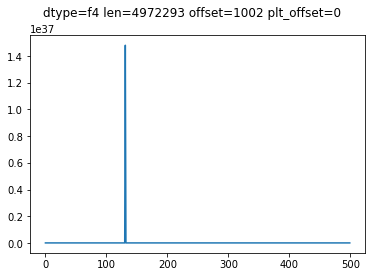

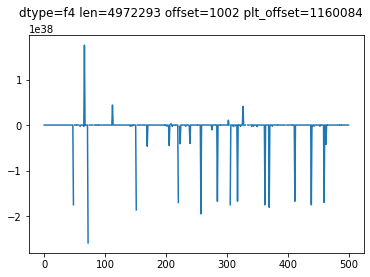

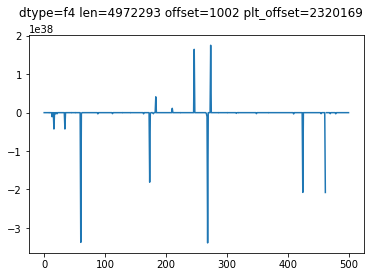

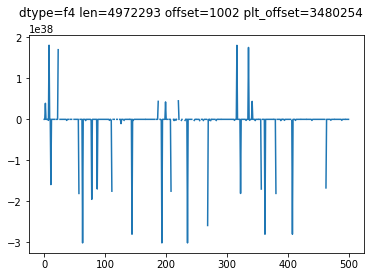

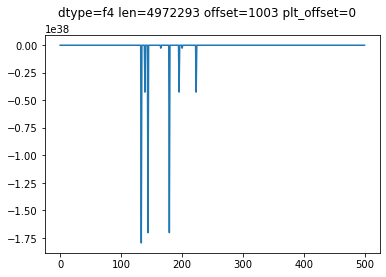

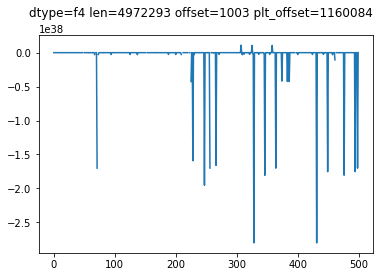

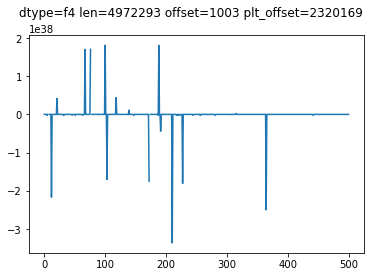

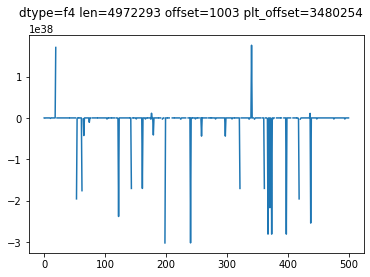

<i2


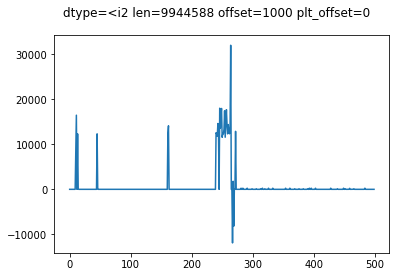

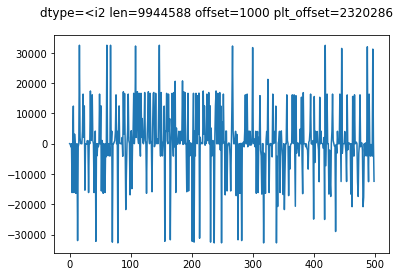

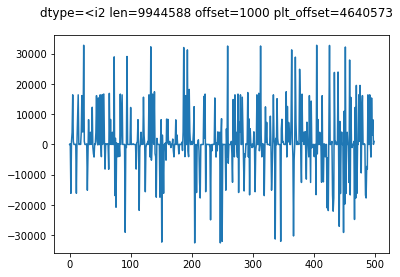

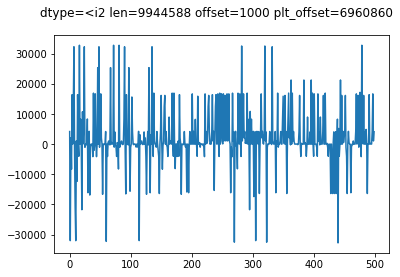

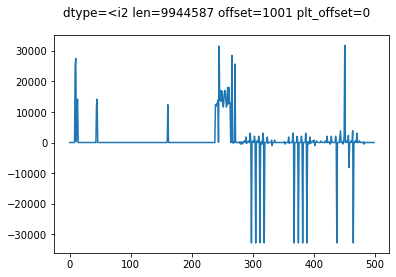

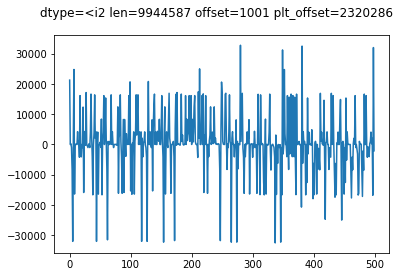

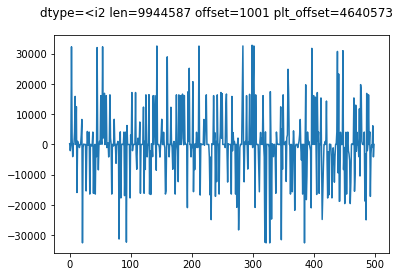

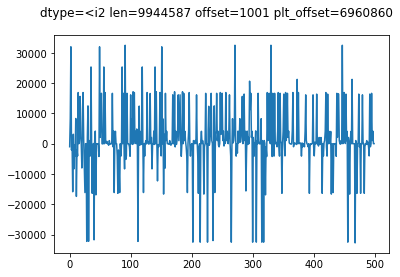

<i4


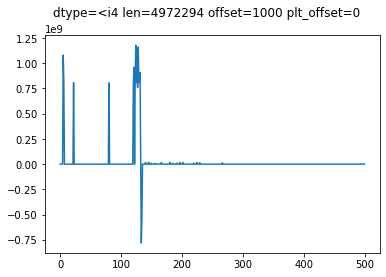

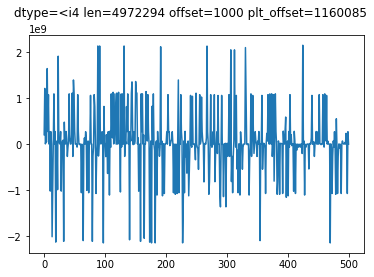

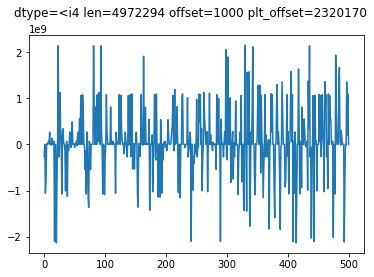

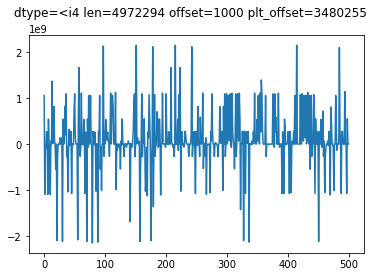

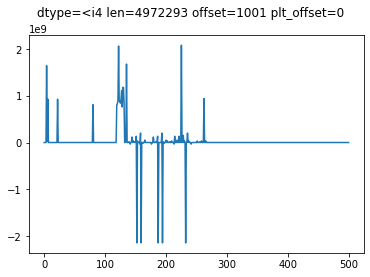

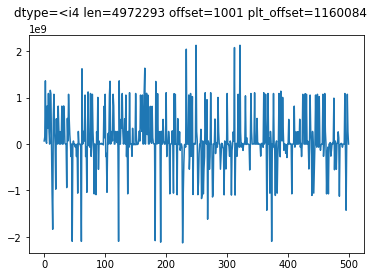

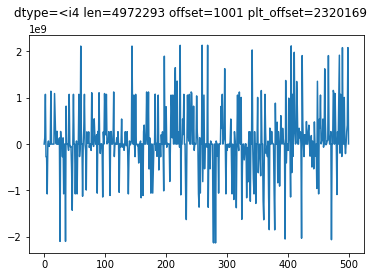

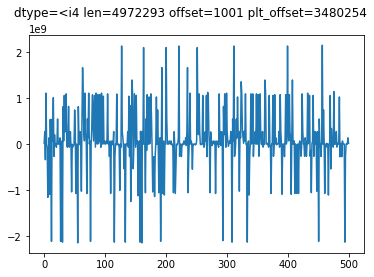

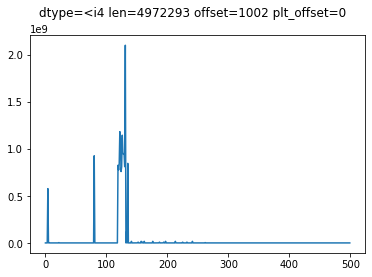

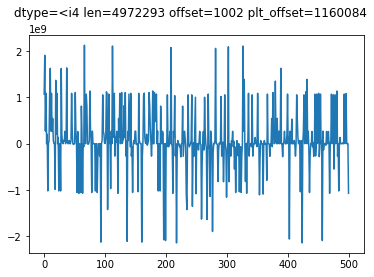

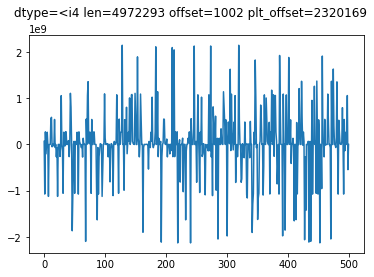

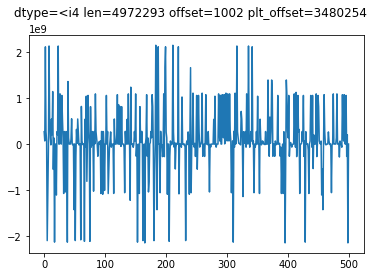

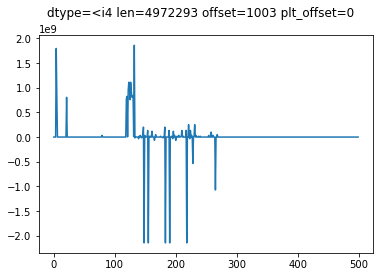

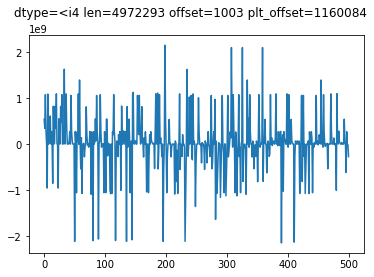

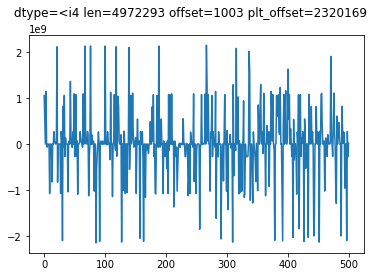

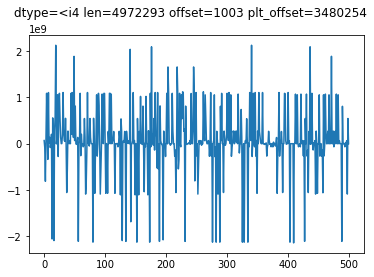

<i8


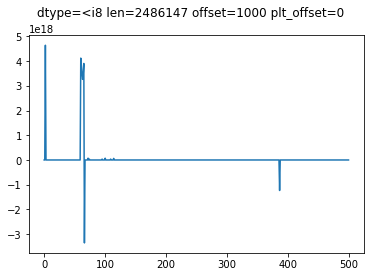

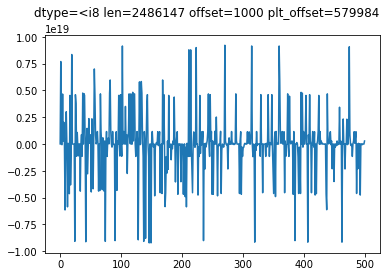

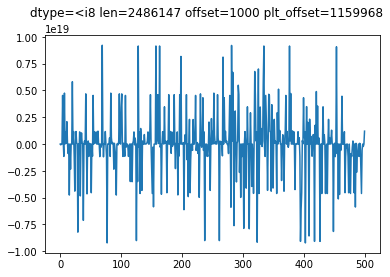

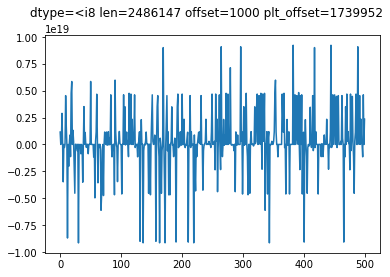

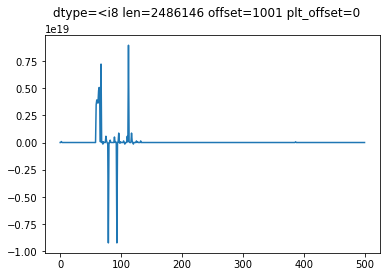

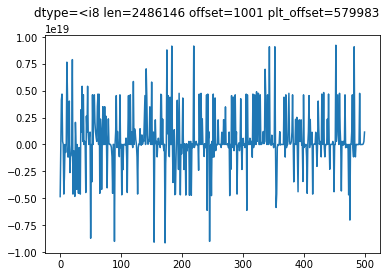

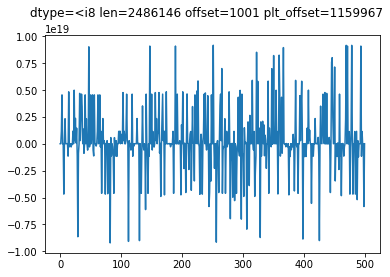

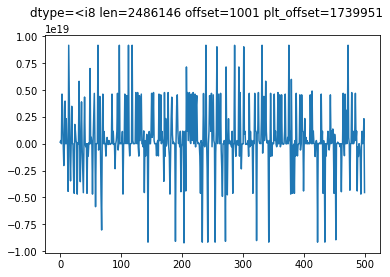

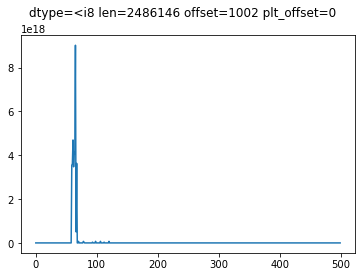

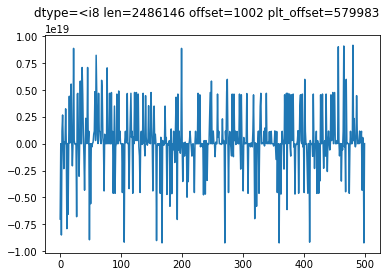

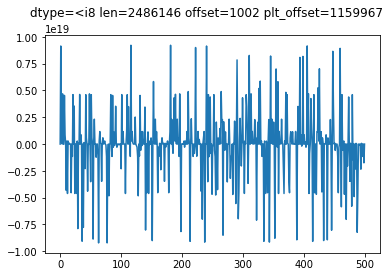

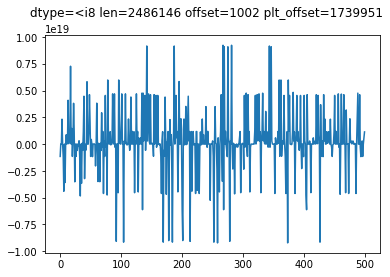

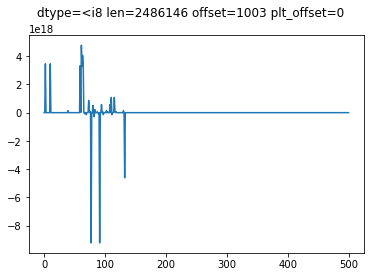

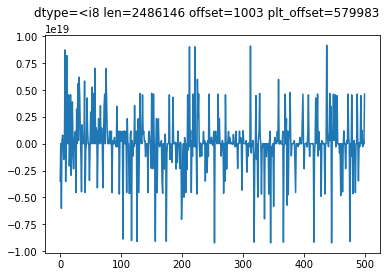

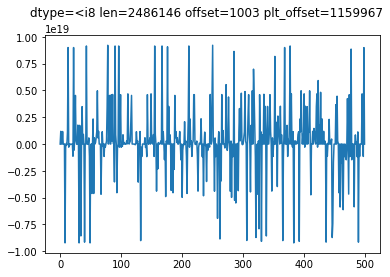

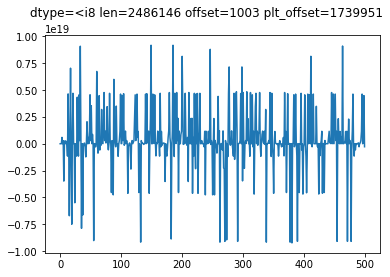

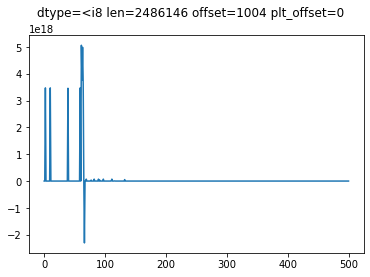

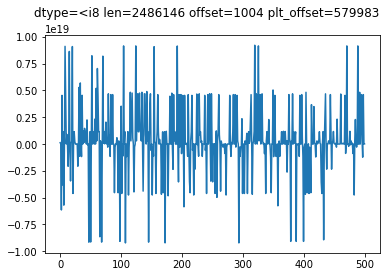

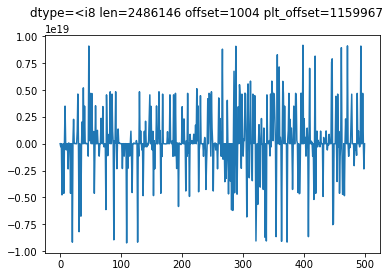

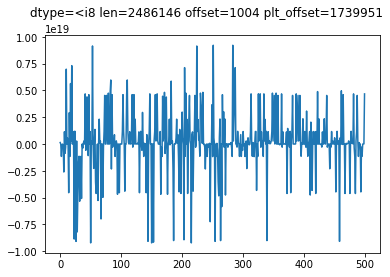

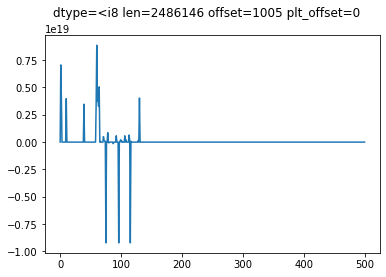

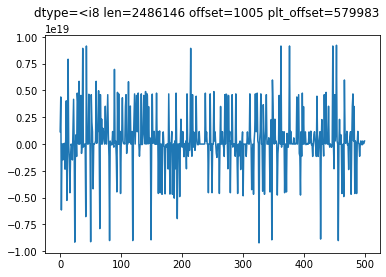

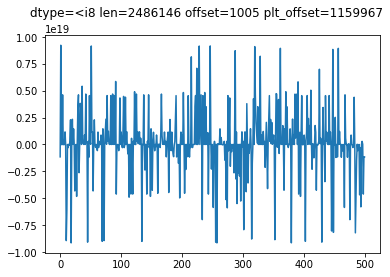

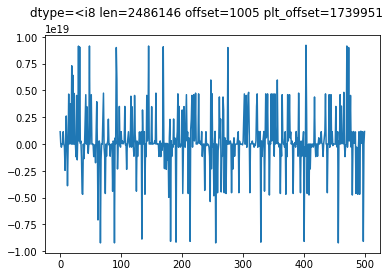

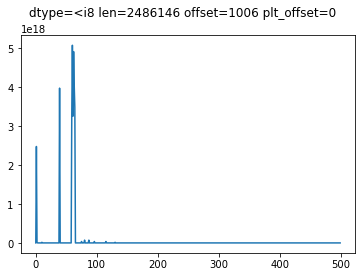

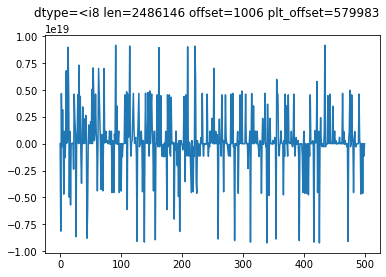

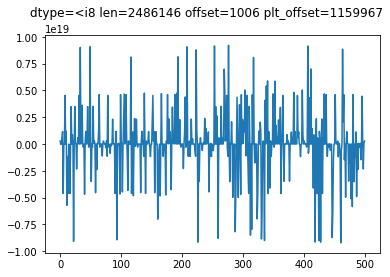

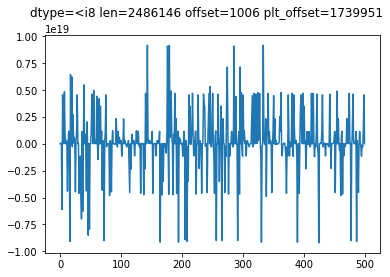

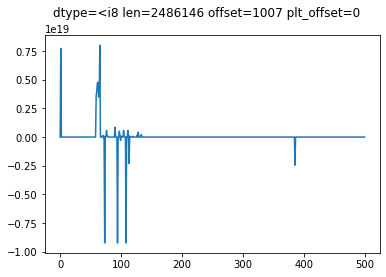

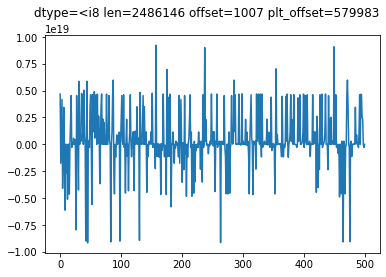

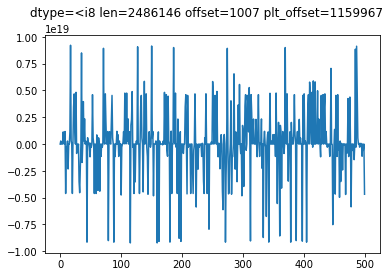

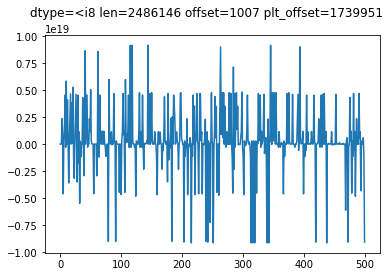

>i2


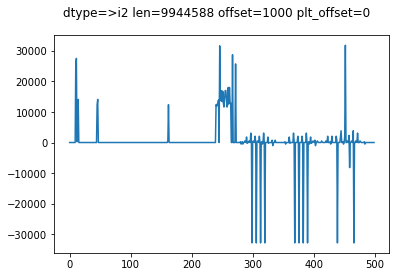

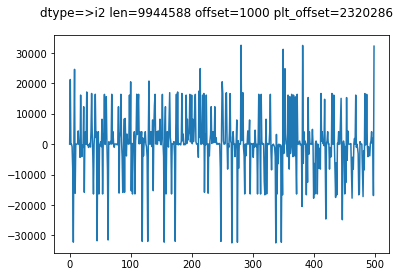

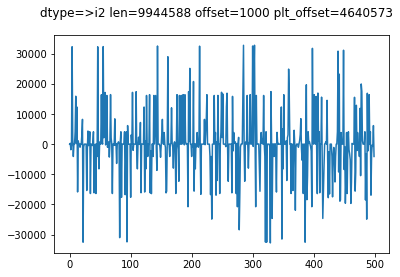

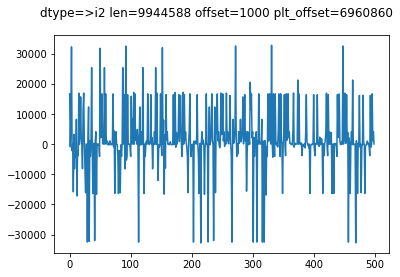

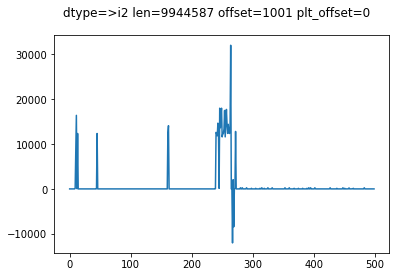

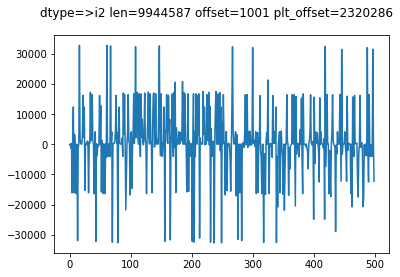

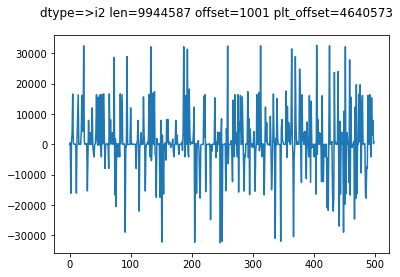

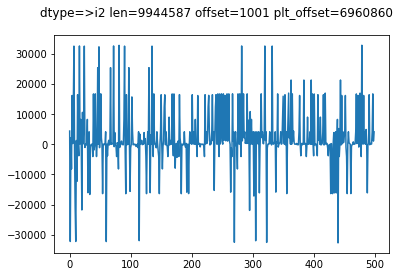

>i4


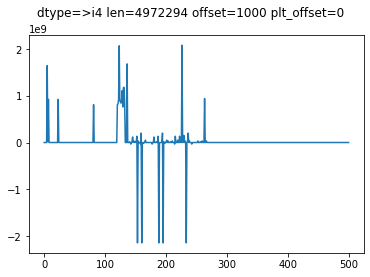

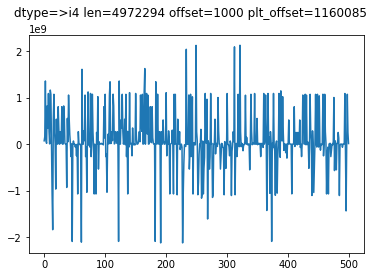

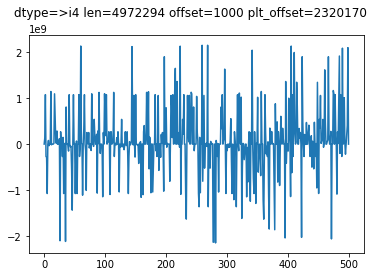

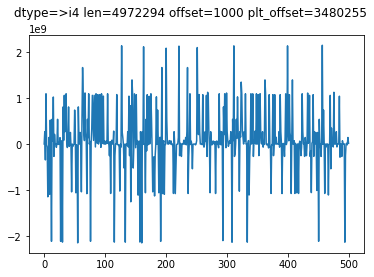

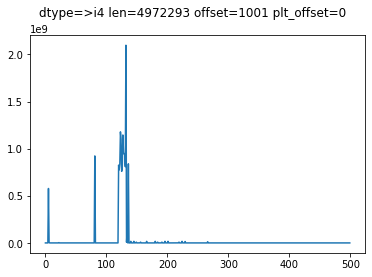

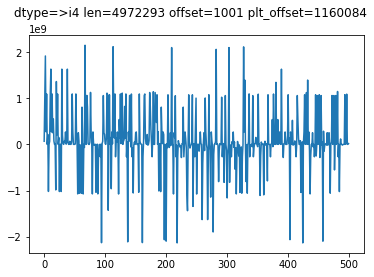

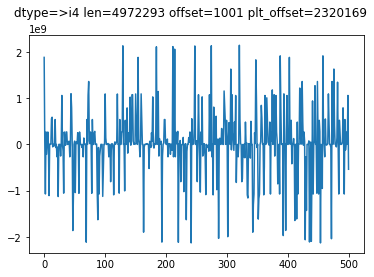

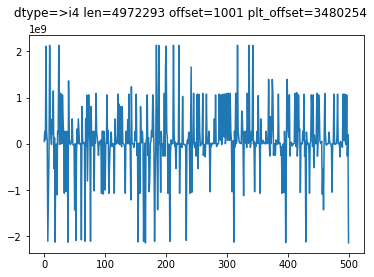

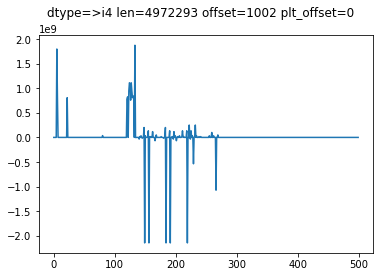

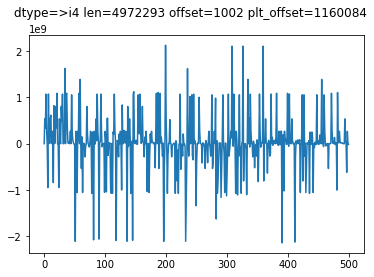

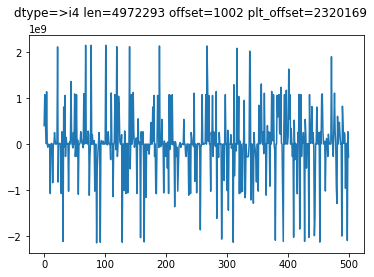

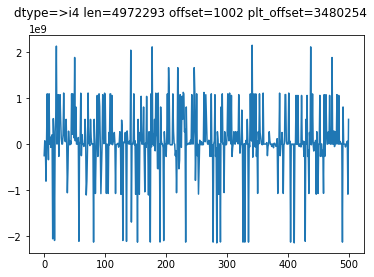

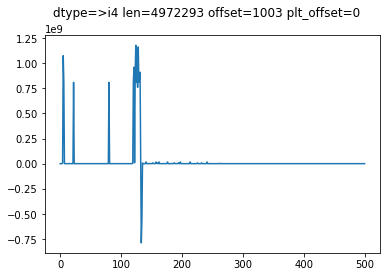

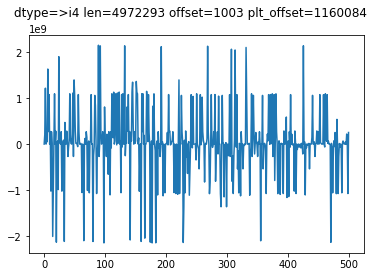

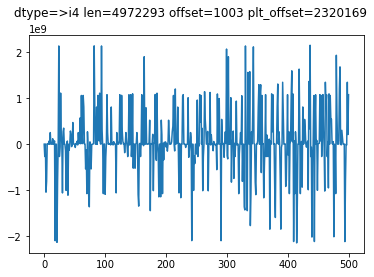

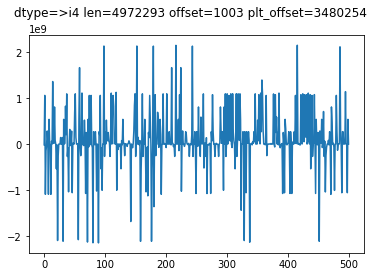

>i8


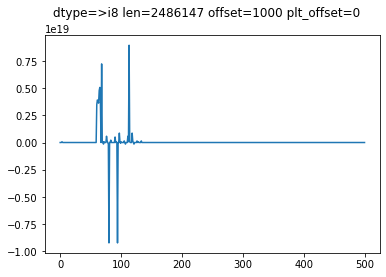

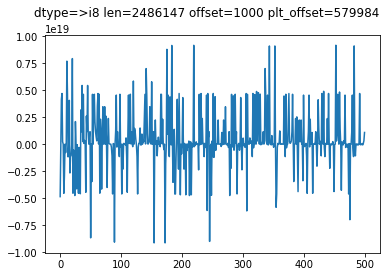

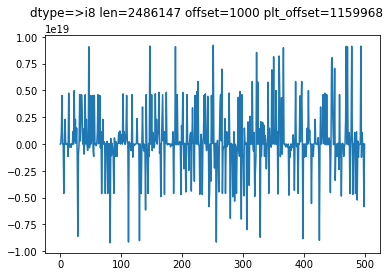

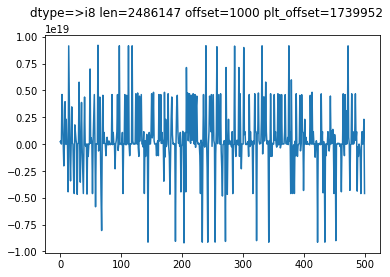

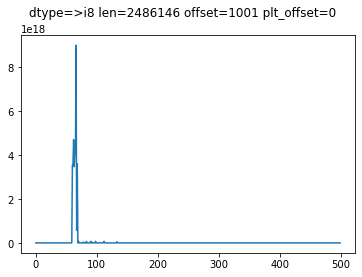

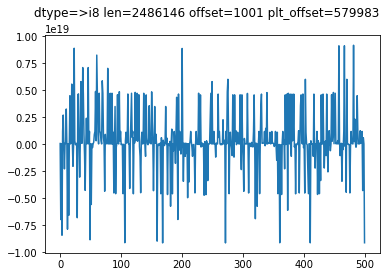

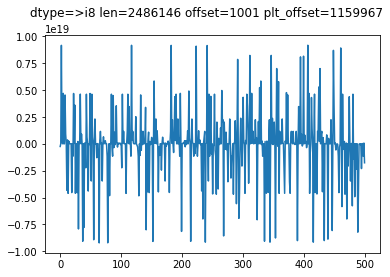

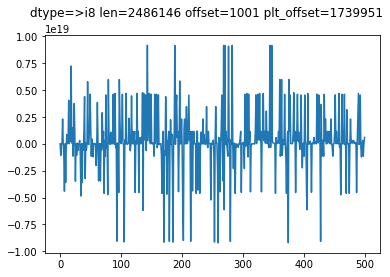

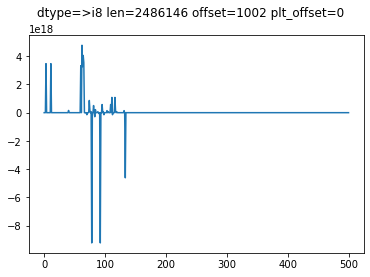

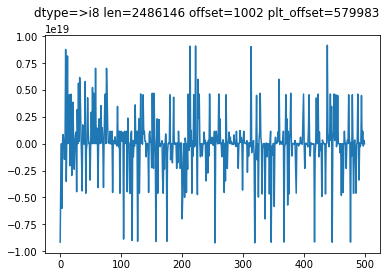

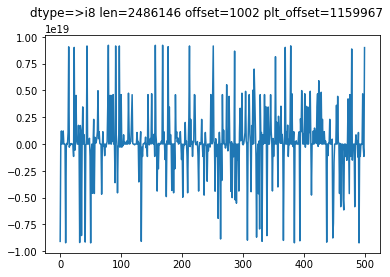

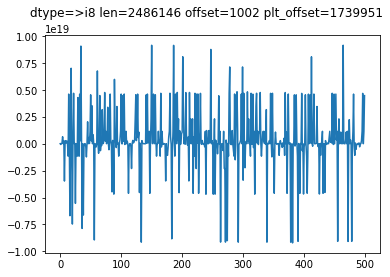

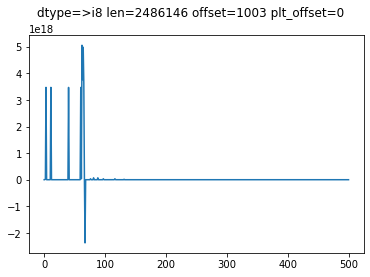

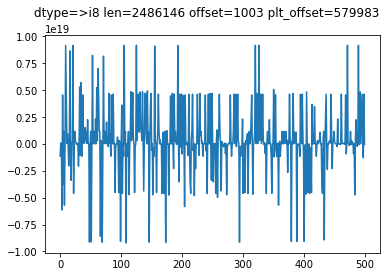

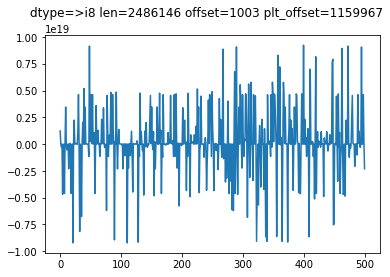

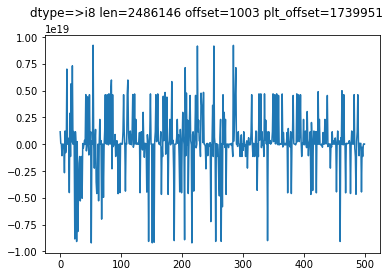

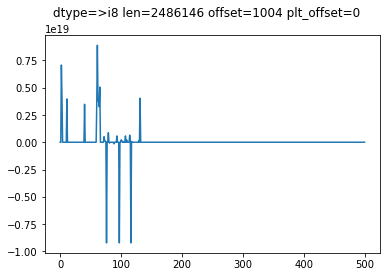

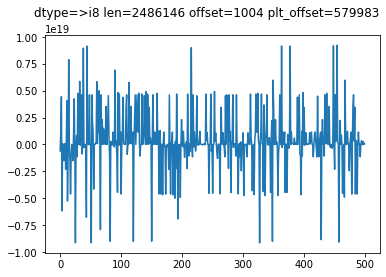

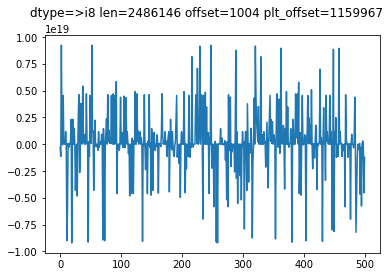

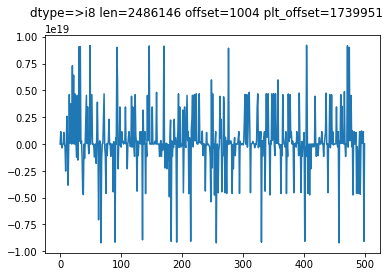

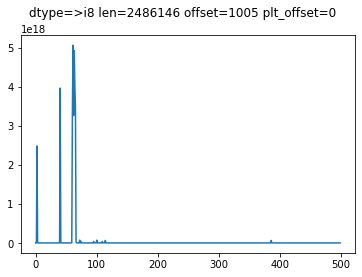

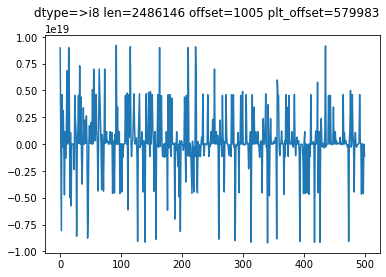

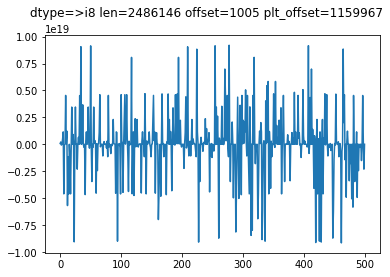

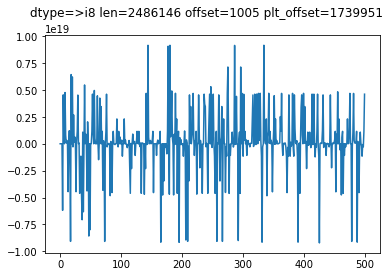

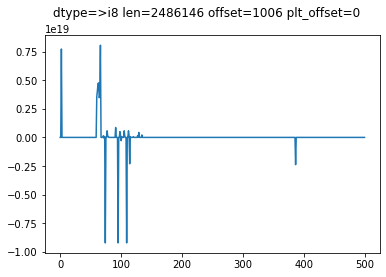

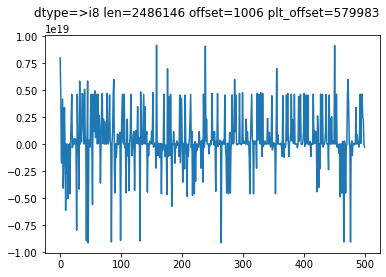

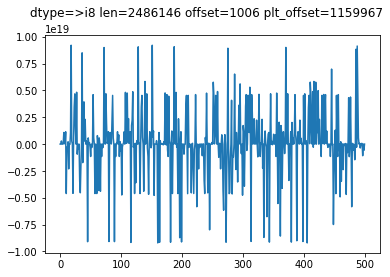

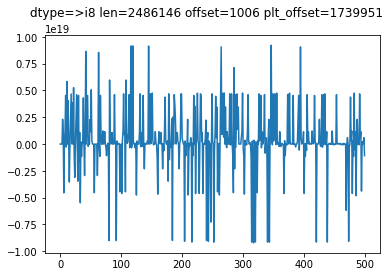

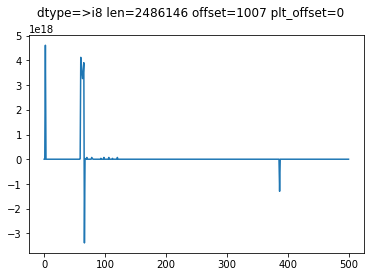

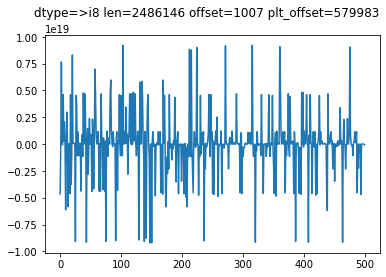

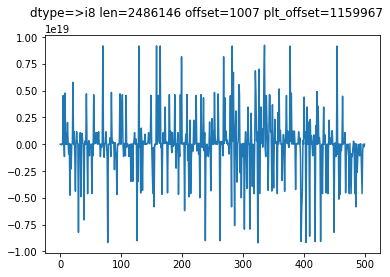

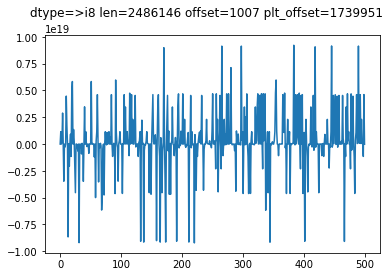

In [44]:
main_offset = 1000
offsets = range(8)
dtypes = ["f2", "f4", "<i2", "<i4","<i8", ">i2", ">i4", ">i8",]
signal_length = 500


for dt, in itertools.product(dtypes):
    print(dt)
    nbytes = int(dt[-1])
    for offsetb in range(0, nbytes):
        m=np.fromfile(fn, dtype=dt, offset=offsetb+main_offset)
        for plt_offset in np.linspace(0,.7,4):
            plo = int((len(m)- signal_length - 1 ) *plt_offset)
            plt.figure()
            plt.plot(m[plo:plo+signal_length])
            plt.suptitle(f"dtype={dt} len={len(m)} offset={offsetb+main_offset} plt_offset={plo}")
            plt.show()


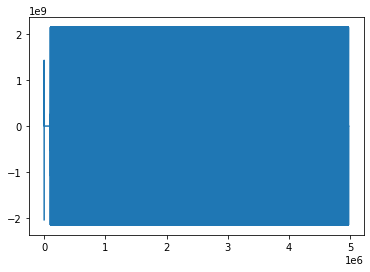

In [8]:
plt.plot(m)

In [18]:
int("f2"[-1])

2

In [6]:
len(hexdata)

256

In [26]:
np.linspace(0,1,3)

array([0. , 0.5, 1. ])